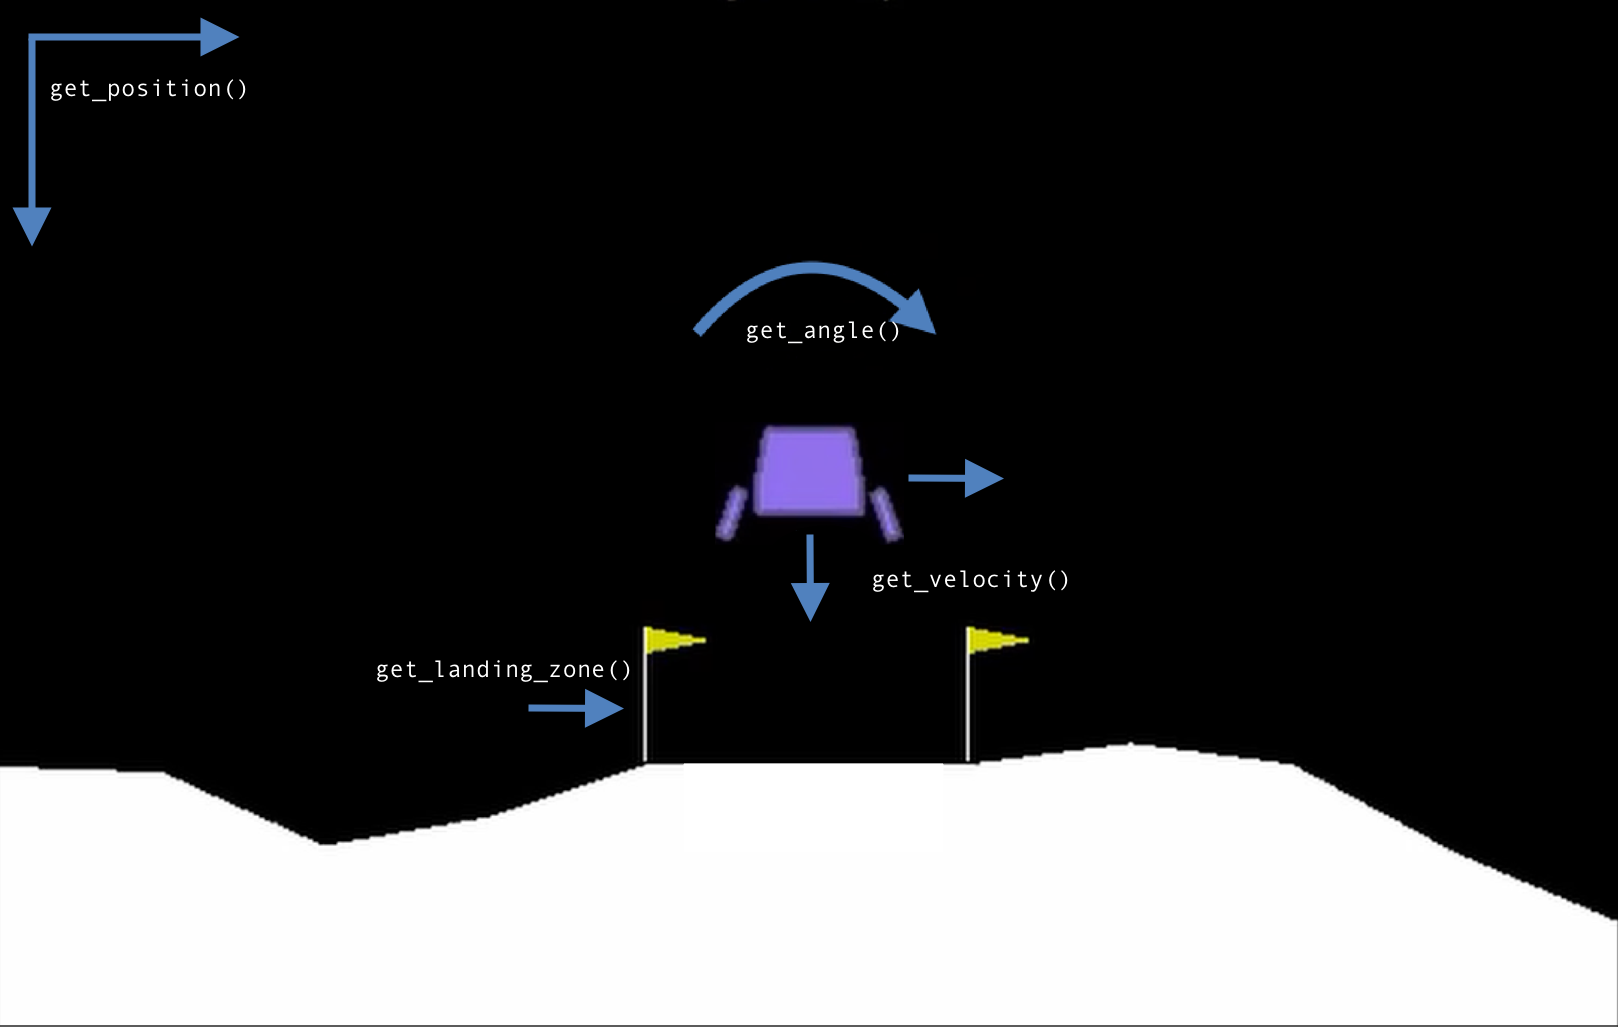

## Creating an Environment
Note on the functions implemented:

* **get_velocity** - returns an array representing the x, y velocity of the lander. Both the x and y velocity are in the range $[0, 60]$.


* **get_angle** - returns a scalar representing the angle of the lander. The angle is in the range $[0, 359]$.


* **get_position** - returns an array representing the x, y position of the lander. Both the x and y position of the agent are in the range $[0, 100]$.


* **get_landing_zone** - returns an array representing the x, y position of the landing zone. Both the x, y coordinates are in the range $[1, 100]$. 


* **get_fuel** - returns a scalar representing the remaining amount of fuel. Fuel starts at $100$ and is in range $[0, 100]$.

In this notebook, we will will be applying these functions to __structure the reward signal__ based on the following criteria:

1. **The lander will crash if** it touches the ground when ``y_velocity < -3`` (the downward velocity is greater than three).


2. **The lander will crash if** it touches the ground when ``x_velocity < -10 or 10 < x_velocity`` (horizontal speed is greater than $10$).


3. The lander's angle taken values in $[0, 359]$. It is completely vertical at $0$ degrees. **The lander will crash if** it touches the ground when ``5 < angle < 355`` (angle differs from vertical by more than $5$ degrees).


4. **The lander will crash if** it has yet to land and ``fuel <= 0`` (it runs out of fuel).


5. MST would like to save money on fuel when it is possible **(using less fuel is preferred)**.


6. The lander can only land in the landing zone. **The lander will crash if** it touches the ground when ``x_position`` $\not\in$ ``landing_zone`` (it lands outside the landing zone).


Fill in the methods below to create an environment for the lunar lander.

In [1]:
import environment as environment
from utils import get_landing_zone, get_angle, get_velocity, get_position, get_fuel, tests
get_landing_zone()
# Lunar Lander Environment
class LunarLanderEnvironment(environment.BaseEnvironment):
    def __init__(self):
        self.current_state = None
        self.count = 0
    
    def env_init(self, env_info):
        # users set this up
        self.state = np.zeros(6) # velocity x, y, angle, distance to ground, landing zone x, y
    
    def env_start(self):
        land_x, land_y = get_landing_zone() # gets the x, y coordinate of the landing zone
        # At the start we initialize the agent to the top left hand corner (100, 20) with 0 velocity 
        # in either any direction. The agent's angle is set to 0 and the landing zone is retrieved and set.
        # The lander starts with fuel of 100.
        # (vel_x, vel_y, angle, pos_x, pos_y, land_x, land_y, fuel)
        self.current_state = (0, 0, 0, 100, 20, land_x, land_y, 100)
        return self.current_state
    
    def env_step(self, action):
        
        land_x, land_y = get_landing_zone() # gets the x, y coordinate of the landing zone
        vel_x, vel_y = get_velocity(action) # gets the x, y velocity of the lander
        angle = get_angle(action) # gets the angle the lander is positioned in
        pos_x, pos_y = get_position(action) # gets the x, y position of the lander
        fuel = get_fuel(action) # get the amount of fuel remaining for the lander
        
        terminal = False
        reward = 0.0
        observation = (vel_x, vel_y, angle, pos_x, pos_y, land_x, land_y, fuel)
        
        # use the above observations to decide what the reward will be, and if the
        # agent is in a terminal state.
        # Recall - if the agent crashes or lands terminal needs to be set to True
        
        # YOUR CODE HERE
        #raise NotImplementedError()

            

        if observation[4] <= observation[6]:
            terminal = True
        
            if observation[1] < -3:
                reward = - 10000
            elif observation[0] < -10 or observation[0] > 10:
                reward = - 10000
            elif observation[2] > 5 and observation[2] < 355:
                reward = - 10000
            elif observation[3] < observation[5] or observation[3] > observation[5]:
                reward = -10000
            else:
                reward = observation[7]
        else:
            if observation[7] <= 0:
                terminal = True
                reward = -10000

        self.reward_obs_term = (reward, observation, terminal)
        return self.reward_obs_term
    
    def env_cleanup(self):
        return None
    
    def env_message(self):
        return None

In [11]:
#!/usr/bin/env python

"""Abstract environment base class for RL-Glue-py.
"""

from __future__ import print_function

from abc import ABCMeta, abstractmethod


class BaseEnvironment:
    """Implements the environment for an RLGlue environment

    Note:
        env_init, env_start, env_step, env_cleanup, and env_message are required
        methods.
    """

    __metaclass__ = ABCMeta

    def __init__(self):
        reward = None
        observation = None
        termination = None
        self.reward_obs_term = (reward, observation, termination)

    @abstractmethod
    def env_init(self, env_info={}):
        """Setup for the environment called when the experiment first starts.

        Note:
            Initialize a tuple with the reward, first state observation, boolean
            indicating if it's terminal.
        """

    @abstractmethod
    def env_start(self):
        """The first method called when the experiment starts, called before the
        agent starts.

        Returns:
            The first state observation from the environment.
        """

    @abstractmethod
    def env_step(self, action):
        """A step taken by the environment.

        Args:
            action: The action taken by the agent

        Returns:
            (float, state, Boolean): a tuple of the reward, state observation,
                and boolean indicating if it's terminal.
        """

    @abstractmethod
    def env_cleanup(self):
        """Cleanup done after the environment ends"""

    @abstractmethod
    def env_message(self, message):
        """A message asking the environment for information

        Args:
            message: the message passed to the environment

        Returns:
            the response (or answer) to the message
        """

## Evaluating your reward function

Designing the best reward function for an objective is a challenging task - it is not clear what the term “best reward function” even means, let alone how to find it. Consequently, rather than evaluating your reward function by quantitative metrics, we merely ask that you check that its behavior is qualitatively reasonable. For this purpose, we provide a series of test cases below. In each case we show a transition and explain how a reward function that we implemented behaves. As you read, check how your own reward behaves in each scenario and judge for yourself whether it acts appropriately. (For the latter parts of the capstone you will use our implementation of the lunar lander environment, so don’t worry if your reward function isn’t exactly the same as ours. The purpose of this of this notebook is to gain experience implementing environments and reward functions.)

### Case 1: Uncertain Future
The lander is in the top left corner of the screen moving at a velocity of (12, 15) with 10 units of fuel &mdash; whether this landing will be successful remains to be seen.

In [3]:
tests(LunarLanderEnvironment, 1)

Reward: 0.0, Terminal: False


In this case we gave the agent no reward, as it neither achieved the objective nor crashed. One alternative is giving the agent a positive reward for moving closer to the goal. Another is to give a negative reward for fuel consumption. What did your reward function do?

Also check to make sure that ``Terminal`` is set to ``False``. Your agent has not landed, crashed, or ran out of fuel. The episode is not over.

### Case 2: Imminent Crash!

The lander is positioned in the target landing zone at a 45 degree angle, but its landing gear can only handle an angular offset of five degrees &mdash; it is about to crash!

In [4]:
tests(LunarLanderEnvironment, 2)

Reward: -10000, Terminal: True


We gave the agent a reward of -10000 to punish it for crashing. How did your reward function handle the crash?

Also check to make sure that ``Terminal`` is set to ``True``. Your agent has crashed and the episode is over.

### Case 3: Nice Landing!
The lander is vertically oriented and positioned in the target landing zone with five units of remaining fuel. The landing is being completed successfully!

In [5]:
tests(LunarLanderEnvironment, 3)

Reward: 5, Terminal: True


To encourage the agent to conserve as much fuel as possible, we reward successful landings proportionally to the amount of fuel remaining. Here, we gave the agent a reward of five since it landed with five units of fuel remaining. How did you incentivize the agent to be fuel efficient?

Also check to make sure that ``Terminal`` is set to ``True``. Your agent has landed and the episode is over.

### Case 4: Dark Times Ahead!
The lander is directly above the target landing zone but has no fuel left. The future does not look good for the agent &mdash; without fuel there is no way for it to avoid crashing!

In [6]:
tests(LunarLanderEnvironment, 4)

Reward: -10000, Terminal: True


We gave the agent a reward of -10000 to punish it for crashing. Did your reward function treat all crashes equally, as ours did? Or did you penalize some crashes more than others? What reasoning did you use to make this decision?

Also check to make sure that ``Terminal`` is set to ``True``. Your agent has crashed and the episode is over.

### Case 5: Where's The Landing Zone?!

The lander is touching down at a vertical angle with fuel to spare. But it is not in the landing zone and the surface is uneven &mdash; it is going to crash!

In [7]:
tests(LunarLanderEnvironment, 5)

Reward: -10000, Terminal: True


We gave the agent a reward of -10000 to punish it for landing in the wrong spot. An alternative is to scale the negative reward by distance from the landing zone. What approach did you take?

Also check to make sure that ``Terminal`` is set to ``True``. Your agent has crashed and the episode is over.